In [1]:
from matplotlib import pyplot as plt
from utils.PatchSequence import PatchSequence
from utils.Dataset import Dataset

2025-08-04 16:52:22.780137: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 16:52:22.797387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754337142.816037    7632 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754337142.821597    7632 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754337142.835337    7632 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
dataset = Dataset(lateralize=False, reduced=True, n=500)

/opt/projects/tesis/utils


In [3]:
# dataset.head().render(render_sample_patch=True)

In [4]:
ds_training = dataset[dataset["split"] == "training"]
ds_test = dataset[dataset["split"] == "test"]

In [5]:
# dataset.stats()

In [6]:
# ds_training.stats()

In [7]:
# ds_test.stats()

In [8]:
dataset.preload_cache()
# # ——————————————#
# # Asume que ya inicializaste tu experiment:
# # experiment = Experiment(api_key="…", project_name="…", workspace="…")
# # ——————————————#
# 
# from tensorflow.keras.regularizers import l1_l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import (
#     GlobalAveragePooling2D,
#     Dense,
#     BatchNormalization,
#     Dropout
# )
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# from tensorflow.keras.metrics import AUC
# 
# # 1. Hiperparámetros
hparams = {
    'IMG_SIZE': (299, 299),
    'BATCH_SIZE': 32,
    'EPOCHS': 10,
    'l1_reg': 1e-4,
    'l2_reg': 1e-4,
    'dropout_rate': 0.4,
    'learning_rate': 1e-4,
    'BACKBONE': 'InceptionV3'
}
# experiment.log_parameters(hparams)
# 
# # 2. Generadores
# train_generator = PatchSequence(
#     ds_training,
#     batch_size=hparams['BATCH_SIZE'],
#     patch_size=hparams['IMG_SIZE'],
#     shuffle=True,
#     preprocess_fn=preprocess_input
# )
# val_generator = PatchSequence(
#     ds_test,
#     batch_size=hparams['BATCH_SIZE'],
#     patch_size=hparams['IMG_SIZE'],
#     shuffle=False,
#     preprocess_fn=preprocess_input
# )
# 
# # 3. Construcción del modelo
# base = InceptionV3(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(*hparams['IMG_SIZE'], 3)
# )
# for layer in base.layers:
#     layer.trainable = False
# 
# x = base.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(
#     512,
#     activation='relu',
#     kernel_regularizer=l1_l2(hparams['l1_reg'], hparams['l2_reg'])
# )(x)
# x = BatchNormalization()(x)
# x = Dropout(hparams['dropout_rate'])(x)
# output = Dense(1, activation='sigmoid')(x)
# 
# model = Model(inputs=base.input, outputs=output)
# 
# # 4. Compilación con AUC ROC
# model.compile(
#     optimizer=Adam(learning_rate=hparams['learning_rate']),
#     loss='binary_crossentropy',
#     metrics=[
#         'accuracy',
#         AUC(name='auc_roc', curve='ROC')
#     ]
# )
# 
# # 5. Entrenamiento con callback de Comet
# keras_callback = Experiment.get_callback('keras')
# model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=hparams['EPOCHS'],
#     steps_per_epoch=len(train_generator),
#     validation_steps=len(val_generator),
#     callbacks=[keras_callback]
# )


Preloading cache: 100%|██████████| 20000/20000 [05:52<00:00, 56.69it/s]


In [9]:
generator = PatchSequence(
    dataset,
    batch_size=hparams['BATCH_SIZE'],
    patch_size=hparams['IMG_SIZE'],
    shuffle=True,
    preprocess_fn=None
)
# for x_batch, y_batch in train_generator:
#     # x_batch: tensor de imágenes, y_batch: etiquetas
#     print(x_batch.shape, y_batch.shape)
#     # aquí p.ej. inspeccionas, guardas, o pasas por model.train_on_batch()

In [10]:
# train_generator.

In [11]:
# generator.__len__()

In [12]:
x0, y0 = generator[0]


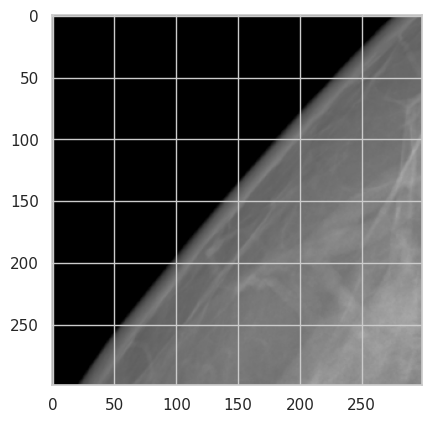

In [13]:
plt.imshow(x0[0].astype("int"))

In [14]:
# for x_batch, y_batch in generator:
#     # x_batch: tensor de imágenes, y_batch: etiquetas
#     print(x_batch.shape, y_batch.shape)
#     # aquí p.ej. inspeccionas, guardas, o pasas por model.train_on_batch()